In [81]:
import os
import re
import sys
from datetime import datetime

import numpy as np
import pandas as pd

from scipy import stats
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
from bokeh.plotting import figure, show
from bokeh.embed import components
from bokeh.models import CategoricalColorMapper, HoverTool
from bokeh.io import output_notebook
output_notebook()
import seaborn as sns
sns.set_style("whitegrid")

Loading BokehJS ...

In [2]:
project_dir = str(os.path.dirname((os.path.abspath(''))))
sys.path.append(project_dir)
print(project_dir)
figures_folder = project_dir + '/Images/'
base_path = project_dir + '/data/raw_scraped/1yr/'
print(base_path)

/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks
/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/


In [3]:
tcker = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
		'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
		'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
		'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','ADI','ANDV',
		'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
		'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY', 'BLL','BAC','BK',
		'BAX','BDX','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
		'BHF','BMY','AVGO','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
		'KMX','CCL','CAT','CNC','CNP','CTL','CERN','CF','SCHW',
		'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
		'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
		'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
		'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
		'DG','DLTR','D','DOV','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
		'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
		'ESS','EL','ES','RE','EXC','EXPE','EXPD','EXR','XOM','FFIV','FB','FAST',
		'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
		'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GIS','GM','GPC','GILD',
		'GPN','GS','GT','GWW','HAL','HBI','HOG','HIG','HAS','HCA','HP','HSIC',
		'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
		'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
		'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
		'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LH','LRCX','LEG','LEN',
		'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
		'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','MCHP','MU',
		'MSFT','MAA','MHK','TAP','MDLZ','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
		'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
		'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
		'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
		'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PFG','PG','PGR',
		'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
		'REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
		'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
		'SPGI','SWK','SBUX','STT','SRCL','SYK','SYF','SNPS','SYY','TROW','TPR',
		'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TSCO','TDG','TRV',
		'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
		'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','V','VNO',
		'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','WDC','WU','WRK','WY','WHR','WMB',
		'WLTW','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']
len(tcker)

478

In [4]:
def file_import(number_articles): 
    df_list=[]
    for i in tcker[0:number_articles]:
        try:
            df = pd.read_csv(base_path+i+'_data.csv', index_col=0, usecols=['Date', 'Adj Close'])
            df = df.rename(columns={'Adj Close':i})
            df_list.append(df)
        except Exception as e:
            print(e)
        df_stocks = pd.concat(df_list, axis=1, sort=False)
    print(df_stocks.shape)
    return df_stocks

In [5]:
def date_filter(df_list, start, end):
    for i in df_list:
        i.dropna()
        mask = (pd.to_datetime(i.Date) > start) & (pd.to_datetime(i.Date) <= end)
        i = i[mask]
        #i = i.sort_values(['Date'])
    return df_list

In [6]:
number_articles = 478
stocks = file_import(number_articles)


[Errno 2] File b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/AET_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/AET_data.csv'
[Errno 2] File b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/ANDV_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/ANDV_data.csv'
[Errno 2] File b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/CSRA_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/CSRA_data.csv'
[Errno 2] File b'/Users/samypalaniappan/Desktop/Metis_Wor

In [7]:
print(stocks.columns)
print(stocks.iloc[0,4])

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=470)
41.45697784423828


In [8]:
stocks.tail()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
2020-02-21,156.929993,87.449997,94.959999,211.889999,63.380001,115.699997,372.950012,53.279999,140.610001,20.750000,...,208.440002,126.885262,70.820000,36.340000,87.720001,88.247078,103.510002,157.389999,45.430000,142.229996
2020-02-24,152.550003,84.629997,93.139999,204.360001,62.310001,112.820000,357.410004,49.119999,139.910004,20.250000,...,205.539993,119.169998,70.370003,34.860001,85.180000,86.163528,100.250000,154.330002,43.759998,138.389999
2020-02-25,146.850006,81.129997,89.180000,197.100006,59.509998,107.349998,347.799988,47.570000,137.600006,19.379999,...,202.639999,113.889999,68.839996,36.459999,83.879997,84.070000,97.949997,149.729996,42.380001,134.820007
2020-02-26,148.960007,81.360001,88.410004,195.669998,59.369999,105.389999,351.339996,47.490002,134.539993,18.690001,...,204.440002,110.750000,68.349998,35.730000,82.599998,83.930000,97.500000,146.559998,41.820000,136.149994
2020-02-27,150.160004,79.190002,85.419998,186.440002,58.330002,99.750000,337.519989,44.009998,134.130005,18.290001,...,194.529999,111.160004,64.849998,33.830002,79.489998,80.660004,92.669998,139.949997,40.590000,133.949997


       Returns  Volatility
MMM  -0.262054    0.255259
ABT   0.059025    0.189060
ABBV  0.166366    0.267495
ACN   0.181255    0.177756
ATVI  0.386087    0.297825


Text(0.5,0,'Cluster ID')

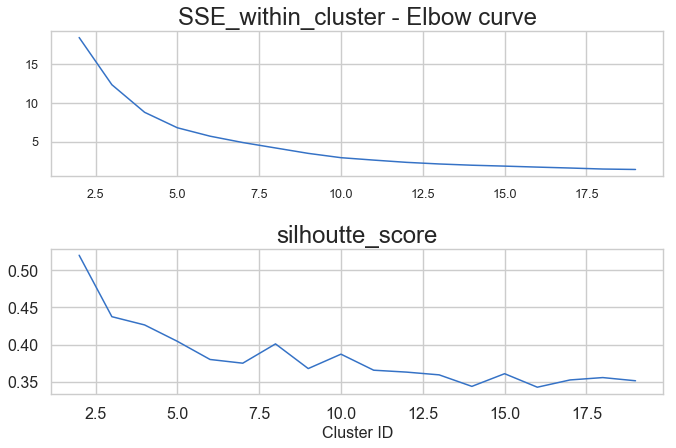

In [9]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = stocks.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = stocks.pct_change().std()*np.sqrt(252)
print(returns.head())
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

SSE_within_cluster = []
silhoutte_score = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    SSE_within_cluster.append(k_means.inertia_)
    silhoutte_score.append(metrics.silhouette_score(data, k_means.labels_, random_state=10))

fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot(211)
plt.plot(range(2, 20), SSE_within_cluster)
plt.grid(True)
plt.title('SSE_within_cluster - Elbow curve', fontsize=24)
ax2 = plt.subplot(212)
plt.plot(range(2, 20), silhoutte_score)
plt.grid(True)
plt.title('silhoutte_score', fontsize=24)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
ax1=plt.gca()
ax1.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.xlabel('Cluster ID', fontsize=16)

In [10]:
print (k_means.labels_)

[16 13 15  1 12  8 14  2  0 13 16  6  6 14 14  9  5  1  8  5 14 10 17  1
  1 15 15  0  1  1  3  1 13 18 14 14 15 18 13 13  6 18 12  9 14  0  5 13
 12  2  9  9 12  1 14  1 15 13 13 13 18 14  6  0  1  6 15  5 13  9 16  8
  6  6  5  1 18  0  0  3 15 14 18 18 14 12  3  9  5  0  5  1  9  9 12  7
  0 14  1 13 18 17  1 14  0 18  9  6 13  1  1  1  9 13 13  3 15  3 16 13
 18  1 16 14  5 14  6 18 18 12  1  9 10 18  6 15  3 13  9  9  9 18 14  9
  1  1  6  1 13 17  5  0  1  9 13 15 14 18  6 14  3  4 14 12 13 13 15 14
  1  6  8  6 13 16 16 15 15  6  8 14  9  1 14  9  9  4 15  3  0  0 14 16
  8  3 13  9  6  5 13  0  0  1 12 13 17  9  3  8  9 13  5  9  8 13 14  5
  0  1  6 14 13  6  0  9 15  9 18 15 14  1  9 14 18  1  6  9  0  6 18 18
 18  0  6  6  1  9  6 13 13  1  0 12  1 18  1 13 13 10  3  0 18  5  1  2
  9 14 13  8 18 14  6 18  9  0  3  3 17  8  6  1  1 15 14  5 13 13 15 13
  6  6  6  9 18 10 12 14  9  0  1 18 12 18 17  1  8  1  8  9  8 18  5 12
  9  9 14  0 13 13  8  8 18  6  1  3  0 16  2  6 17

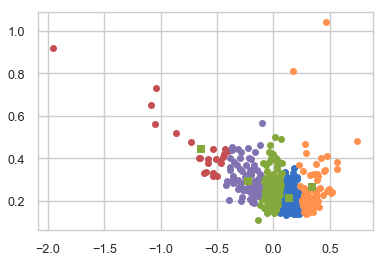

In [11]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8);

In [12]:
#identify the outlier
print(returns.idxmax())

Returns       AMD
Volatility    PCG
dtype: object


In [13]:
#drop the relevant stock from our data
returns.drop('BHF',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

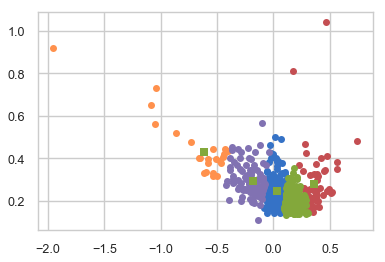

In [14]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8);

In [15]:
print(returns.idxmax())

Returns       AMD
Volatility    PCG
dtype: object


In [16]:
#drop the relevant stock from our data
returns.drop('COL',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

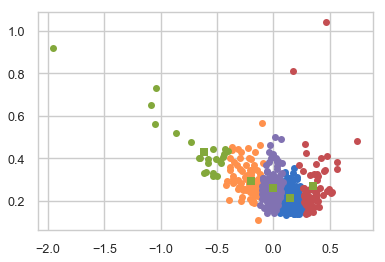

In [17]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing

plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8);

In [18]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for i in details:
    if i[1]==0:
        l1.append(i[0])
    elif i[1]==1:
        l2.append(i[0])
    elif i[1]==2:
        l3.append(i[0])
    elif i[1]==3:
        l4.append(i[0])
    else:
        l5.append(i[0])      
print(len(l1))
print(len(l2))
print(len(l3))
print(len(l4))
print(len(l5))
data1 = [l1, l2, l3, l4, l5]

163
87
67
23
128


In [19]:
dic = {'l1':l1, 'l2':l2, 'l3':l3, 'l4':l4, 'l5':l5}
new_df = pd.DataFrame(data=data1).transpose()
new_df = new_df.rename(columns={0:'Group1', 1:'Group2',2:'Group3',3:'Group4',4:'Group5'})
new_df.head()

,Group1,Group2,Group3,Group4,Group5
0,ABT,MMM,ATVI,ADS,AFL
1,ABBV,AYI,ADBE,AAL,A
2,ACN,AAP,AMD,COG,ALK
3,AES,AMG,AKAM,CCL,ALB
4,APD,ALXN,ALLE,CHK,ALGN


In [20]:
for i in l4:
    print(i)

ADS
AAL
COG
CCL
CHK
XEC
CXO
DVN
DXC
EQT
FLR
FL
GPS
GT
HAL
KSS
MAC
M
MRO
MOS
OXY
RRC
TRIP


In [21]:
def file_imp(number_articles): 
    df_list=[]

    for i in tcker[0:number_articles]:
        print(i)
        try:
            df = pd.read_csv(base_path+i+'_data.csv', index_col=0, 
                             usecols=['Date','Volume','Adj Close', 'Name'])
            df_list.append(df)
        except Exception as e:
            print(e)
        df_stocks = pd.concat(df_list)
    print(df_stocks.shape)
    return df_stocks

In [22]:
number_articles = 475
full_df = file_imp(number_articles)
full_df.head()
full_df.shape

MMM
ABT
ABBV
ACN
ATVI
AYI
ADBE
AMD
AAP
AES
AET
[Errno 2] File b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/AET_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/AET_data.csv'
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANDV
[Errno 2] File b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/ANDV_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/1yr/ANDV_data.csv'
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
AJG
AIZ
T
ADSK
ADP
AZO
AVB
AVY
BLL
BAC
BK
BAX
BDX
BBY
BIIB
BLK
HRB
BA
BWA
BXP
BSX
BHF
BMY
AVGO
CHRW
CA
COG
CDNS
CPB
COF
CAH
CBOE
KMX
CCL

(117671, 3)

In [23]:
full_df.shape

(117671, 3)

In [80]:
full_df = full_df.reset_index()
print(full_df.columns)
for i in range(len(full_df.Date)):
    full_df.loc[i,'Date'] = pd.to_datetime(full_df.loc[i,'Date']).date()
print(type(full_df.Date[5]))
full_df.head()

Index(['level_0', 'index', 'Date', 'Volume', 'Adj Close', 'Name', 'Cluster'], dtype='object')


KeyboardInterrupt: 

In [25]:
for i in range(len(full_df)):
    if full_df.loc[i, 'Name'] in l1:
        full_df.loc[i, 'Cluster']=1
    elif full_df.loc[i, 'Name'] in l2:
        full_df.loc[i, 'Cluster']=2
    elif full_df.loc[i, 'Name'] in l3:
        full_df.loc[i, 'Cluster']=3
    elif full_df.loc[i, 'Name'] in l4:
        full_df.loc[i, 'Cluster']=4
    else:
        full_df.loc[i, 'Cluster']=5

In [45]:
cluster = full_df.groupby(['Cluster', 'Name', 'Date']).mean()
cluster = cluster.reset_index()
cluster = cluster.rename(columns={'Adj Close':'Price'})
cluster.head()
cluster.to_csv('1yr_cluster.csv')

## Evaluating Returns

In [119]:
def import_files(path_name, name):
    file = path_name+name
    df = pd.read_csv(file, delimiter=',')
    return df

In [227]:
cluster5 = pd.read_csv('1yr_cluster.csv').drop(columns=['Unnamed: 0'])
for i in range(len(cluster5)):
    cluster5.loc[i, 'Date'] = pd.to_datetime(cluster5.loc[i, 'Date'],
                                          format='%Y/%m/%d').date()
print(cluster5.shape)
cluster5

(117671, 5)


,Cluster,Name,Date,Volume,Price
0,1.0,ABBV,2019-02-27,4175500.0,75.070122
1,1.0,ABBV,2019-02-28,6310800.0,74.909409
2,1.0,ABBV,2019-03-01,8567900.0,75.722404
3,1.0,ABBV,2019-03-04,5872500.0,75.117378
4,1.0,ABBV,2019-03-05,5933100.0,74.597435
...,...,...,...,...,...
117666,5.0,YUM,2020-02-21,1015100.0,103.510002
117667,5.0,YUM,2020-02-24,1539100.0,100.250000
117668,5.0,YUM,2020-02-25,2389000.0,97.949997
117669,5.0,YUM,2020-02-26,3382500.0,97.500000


In [228]:
path_name='/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/raw_scraped/'
sp500 = import_files(path_name, 'SP500.csv')
sp500 = sp500.rename(columns={'Adj Close':'Price'})
sp500['Name']='SP500'
sp500['Cluster']=6.0
sp500 = sp500.drop(columns=['Open', 'Close', 'High', 'Low'])
cols = ['Cluster', 'Name', 'Date', 'Volume', 'Price']
sp500 = sp500[cols]
for i in range(len(sp500)):
    sp500.loc[i, 'Date'] = pd.to_datetime(sp500.loc[i, 'Date'],
                                          format='%Y/%m/%d').date()
start = pd.to_datetime('2019-02-26', format='%Y/%m/%d').date()
end = pd.to_datetime('2020-02-28', format='%Y/%m/%d').date()
mask = (sp500.Date > start) & (sp500.Date < end)
sp500 = sp500[mask]
print(sp500.shape)
sp500.tail()


(252, 5)


,Cluster,Name,Date,Volume,Price
1291,6.0,SP500,2020-02-20,4007320000,3373.229980
1292,6.0,SP500,2020-02-21,3899270000,3337.750000
1293,6.0,SP500,2020-02-24,4842960000,3225.889893
1294,6.0,SP500,2020-02-25,5591510000,3128.209961
1295,6.0,SP500,2020-02-26,5478110000,3116.389893


In [229]:
cluster6 = pd.concat([cluster5, sp500])
cluster6.shape

(117923, 5)

In [230]:
cluster_avg = pd.DataFrame(cluster5.groupby(['Date']).agg('mean')).reset_index()
cluster_avg['Cluster']=7.0
cluster_avg['Name']='AVG'
cols = ['Cluster', 'Name', 'Date', 'Volume', 'Price']
cluster_avg = cluster_avg[cols]
for i in range(len(cluster_avg)):
    cluster_avg.loc[i, 'Date'] = pd.to_datetime(cluster_avg.loc[i, 'Date'],
                                          format='%Y/%m/%d').date()
print(cluster_avg.shape)
cluster_avg.tail()

(253, 5)


,Cluster,Name,Date,Volume,Price
248,7.0,AVG,2020-02-21,4.449113e+06,130.123950
249,7.0,AVG,2020-02-24,5.838987e+06,126.152914
250,7.0,AVG,2020-02-25,6.673534e+06,122.271968
251,7.0,AVG,2020-02-26,6.660411e+06,121.619050
252,7.0,AVG,2020-02-27,8.569318e+06,117.023955


In [231]:
cluster_avg = pd.concat([cluster5, cluster_avg])
print(cluster_mean.shape)

cluster7 = pd.concat([cluster6, cluster_avg])
print(cluster7.shape)
cluster7.Cluster.unique()

(117924, 5)
(235847, 5)


array([1., 2., 3., 4., 5., 6., 7.])

In [232]:
data = pd.DataFrame(cluster_avg.groupby(['Cluster', 'Date']).agg('mean'))
unstacked_price = data.unstack(level=0).drop(columns=['Volume'])
unstacked_volume = data.unstack(level=0).drop(columns=['Price'])

In [233]:
data = pd.DataFrame(cluster_avg.groupby(['Cluster', 'Date']).agg('mean'))
unstacked_price = data.unstack(level=0).drop(columns=['Volume'])
unstacked_volume = data.unstack(level=0).drop(columns=['Price'])
unstacked_price 

Price                                                \
Cluster            1.0        2.0         3.0        4.0         5.0   
Date                                                                   
2019-02-27  137.291547  78.078749  117.057150  45.461216  100.534787   
2019-02-28  137.641711  77.776586  117.515164  45.147866  100.103088   
2019-03-01  138.654212  78.315206  118.666945  45.775936  100.799107   
2019-03-04  138.322435  77.364273  118.248438  45.517727   99.979616   
2019-03-05  138.198740  77.122126  117.858147  45.330114   99.754421   
...                ...        ...         ...        ...         ...   
2020-02-21  174.268201  67.799593  179.607784  28.461304  108.904213   
2020-02-24  169.361153  64.985988  174.891295  27.014071  105.270142   
2020-02-25  164.643768  62.254341  170.035645  25.462517  101.759203   
2020-02-26  164.128359  61.311555  169.632496  24.366475  101.076878   
2020-02-27  157.103368  59.750119  161.686060  23.211304   98.025586   

                        
Cluster            7.0  
Date                    
2019-02-27  108.971269  
2019-02-28  108.968140  
2019-03-01  109.807959  
2019-03-04  109.220095  
2019-03-05  109.005684  
...                ...  
2020-02-21  130.123950  
2020-02-24  126.152914  
2020-02-25  122.271968  
2020-02-26  121.619050  
2020-02-27  117.023955  

[253 rows x 6 columns]

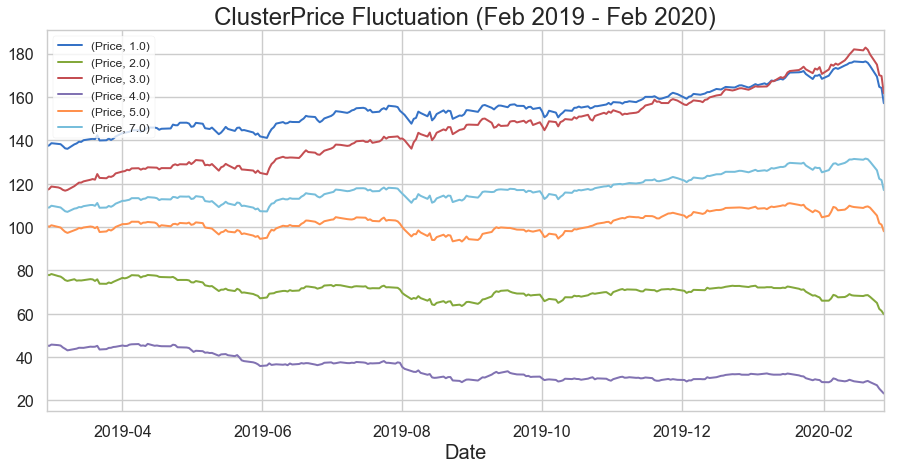

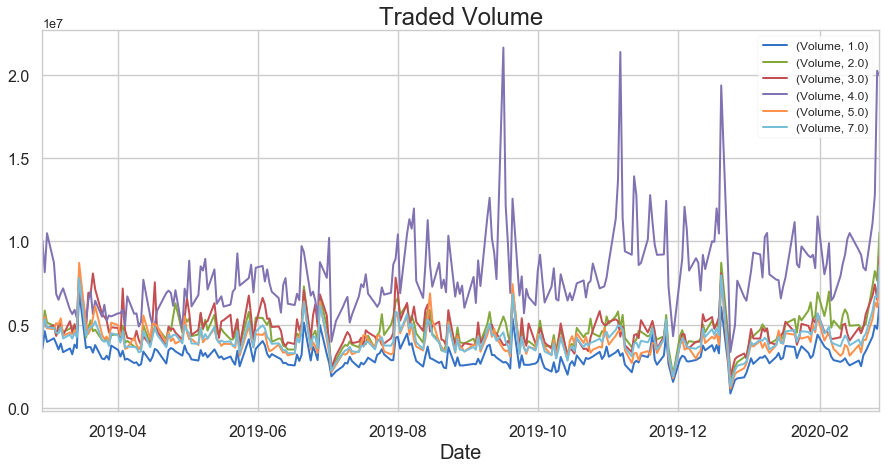

In [234]:
unstacked_price.plot(legend=True, figsize=(15, 7), linewidth=2)
plt.title('ClusterPrice Fluctuation (Feb 2019 - Feb 2020)', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12)

unstacked_volume.plot(legend=True, figsize=(15, 7), linewidth=2)
plt.title('Traded Volume', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12);

In [252]:
maxi = pd.to_datetime('2020-02-20', format='%Y/%m/%d').date()
mini = pd.to_datetime('2019-03-01', format='%Y/%m/%d').date()
mask = cluster7.Date == maxi
cluster_max = cluster7[mask]
cluster_max = cluster_max.rename(columns={'Volume':'Final_Vol','Price':'Final_Price'})
print(cluster_max.shape)
print(cluster_max.Cluster.unique())
mask = cluster7.Date == mini
cluster_min = cluster7[mask]
cluster_min = cluster_min.rename(columns={'Volume':'Init_Vol','Price':'Init_Price'})
print(cluster_min.Cluster.unique())
print(cluster_min.shape)
minmax = pd.merge(left=cluster_min, right=cluster_max, on='Name')
minmax.head()

(930, 5)
[1. 2. 3. 4. 5. 6. 7.]
[1. 2. 3. 4. 5. 6. 7.]
(930, 5)


,Cluster_x,Name,Date_x,Init_Vol,Init_Price,Cluster_y,Date_y,Final_Vol,Final_Price
0,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
1,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
2,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
3,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
4,1.0,ABC,2019-03-01,902600.0,81.427872,1.0,2020-02-20,1808100.0,96.529999


In [255]:
minmax = pd.merge(left=cluster_min, right=cluster_max, on='Name', how='outer')
minmax = minmax.dropna()
print(minmax.Cluster_x.unique())
minmax.head()


[1. 2. 3. 4. 5. 6. 7.]


,Cluster_x,Name,Date_x,Init_Vol,Init_Price,Cluster_y,Date_y,Final_Vol,Final_Price
0,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
1,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
2,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
3,1.0,ABBV,2019-03-01,8567900.0,75.722404,1.0,2020-02-20,5446200.0,94.230003
4,1.0,ABC,2019-03-01,902600.0,81.427872,1.0,2020-02-20,1808100.0,96.529999


In [257]:
gb = minmax.groupby('Cluster_x')
cluster_earnings = gb.agg({'Name':'count', 'Init_Price':'sum', 'Final_Price':'sum'})
cluster_earnings['Return'] = (cluster_earnings.Final_Price - cluster_earnings.Init_Price)\
/cluster_earnings.Init_Price*100
cluster_earnings = cluster_earnings.reset_index().rename(columns={'Cluster_x':'Cluster'})
#cluster_earnings['Cluster'] = [str(x) for x in cluster_earnings.index]
cluster_earnings['Cluster']=['1', '2', '3','4','5','S&P500', 'AVG']
# cluster_earnings.loc[6, 'Cluster']='AVG'
cluster_earnings.loc[6, 'Name']=456
cluster_earnings.head(7)

,Cluster,Name,Init_Price,Final_Price,Return
0,1,644,89553.700851,113167.366150,26.368162
1,2,332,26000.648426,23024.458109,-11.446600
2,3,264,31328.073593,47981.655899,53.158654
3,4,92,4211.386066,2669.064346,-36.622663
4,5,516,52399.455620,56505.087727,7.835257
5,S&P500,1,2803.689941,3373.229980,20.313945
6,AVG,456,109.807959,131.272582,19.547420


In [266]:
# from bokeh.charts import Bar, output_notebook, show, vplot
from bokeh.palettes import Blues5
from bokeh.models import Legend
from bokeh.plotting import figure

x = cluster_earnings.Cluster
y = cluster_earnings.Return
z = cluster_earnings.Name

plot = figure(x_range=x, y_range=(-50, 60), plot_width=400, plot_height=400, 
           x_axis_label='Cluster', y_axis_label='Average Returns (%)')


plot.xaxis.major_label_orientation = np.pi/4  
plot.xaxis.axis_label_text_font_size = "16pt"
plot.xaxis.major_label_text_font_size = "16pt"
plot.xaxis.axis_label_text_font = "times"
plot.xaxis.axis_label_text_color = "black"


plot.yaxis.axis_label_text_font_size = "16pt"
plot.yaxis.major_label_text_font_size = "16pt"
plot.yaxis.axis_label_text_font = "times"
plot.yaxis.axis_label_text_color = "black"
plot.vbar(x=x, width=0.5, bottom=0,
       top=y, color="blue")
show(plot)

In [264]:
x = cluster_earnings.Cluster
y = cluster_earnings.Return
z = cluster_earnings.Name/3

plot = figure(x_range=x, y_range=(0, 500), plot_width=400, plot_height=400, 
           x_axis_label='Cluster', y_axis_label='No. of stocks in the cluster')

plot.xaxis.major_label_orientation = np.pi/4  
plot.xaxis.axis_label_text_font_size = "16pt"
plot.xaxis.major_label_text_font_size = "16pt"
plot.xaxis.axis_label_text_font = "times"
plot.xaxis.axis_label_text_color = "black"


plot.yaxis.axis_label_text_font_size = "16pt"
plot.yaxis.major_label_text_font_size = "16pt"
plot.yaxis.axis_label_text_font = "times"
plot.yaxis.axis_label_text_color = "black"
plot.vbar(x=x, width=0.5, bottom=0,
       top=z, color="orange")

show(plot)

In [271]:
mask = cluster5.Cluster == 3.0
cluster3 = cluster5[mask]
cluster3 =cluster3.groupby('Name').agg('mean').reset_index()
dct =[]
for i in range(len(cluster3)):
    x = {'Name':cluster3.Name[i], 'Price':int(cluster3.Price[i])}
    dct.append(x)
    
df = pd.DataFrame(dct)
df.to_csv('1yr_result.csv')
for i in range(len(df)):
    print(f'{df.Name[i]}; {df.Price[i]}')

AAPL; 229
ADBE; 295
AGN; 162
AIZ; 115
AKAM; 84
ALLE; 107
AMAT; 49
AMD; 34
AMT; 212
ANSS; 219
ARNC; 25
ATVI; 51
BLL; 67
CAG; 28
CBOE; 111
CCI; 134
CHTR; 423
CMG; 773
COST; 275
CPB; 42
CTAS; 247
DG; 142
DGX; 100
DHI; 48
DVA; 61
EFX; 135
EQIX; 525
ES; 78
ETR; 108
EW; 209
FBHS; 56
FIS; 128
FISV; 101
GPN; 164
HSY; 139
INFO; 65
KLAC; 142
KMX; 85
KSU; 133
LEN; 54
LRCX; 229
MA; 272
MAA; 122
MCO; 211
MSFT; 139
MU; 45
NEE; 217
NEM; 37
NVDA; 190
PCG; 14
PHM; 35
QCOM; 76
QRVO; 83
RMD; 131
SBAC; 232
SIG; 19
SNPS; 131
SO; 57
SPGI; 245
SRCL; 53
SWKS; 89
TDG; 486
TGT; 97
TIF; 106
WDC; 53
WU; 22
